# INTRODUCTION

Code produced by Zainab Akhtar

**Imports**

In [58]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

**Utility Functions**


In [59]:
# Function to extract information about the Data Frame.
def data_review(df):
  info = {
      'Number of Rows': df.shape[0],
      'Number of Columns': df.shape[1],
      'Missing Values': df.isnull().sum().sum(),
      'Duplicate Values': df.duplicated().sum(),
  }

  return info

**Note:**

MinMaxScaler is preferred over StandardScaler in the following scenarios:

- When the data is not normally distributed.
- When training and predicting with neural networks.
- When features have different units, indicating varying scales.

# DATA PREPROCESSING

**Data Loading and Review**

In [60]:
# Load data into a Pandas data frame.
file_path = '../data/final_dataset_aggregated.csv'
data = pd.read_csv(file_path)

# Convert 'Date' and 'Time' columns to datetime
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')

# Extract date and time features
data['Month'] = data['DateTime'].dt.month
data['Day'] = data['DateTime'].dt.day
data['Hour'] = data['DateTime'].dt.hour

# Drop original 'Date' and 'Time' columns
data.drop(['Date', 'Time', 'DateTime', 'Outdoor Temperature_mean','Outdoor Temperature_min','Outdoor Temperature_max','Classroom Category','Device Code','Measured RH_min','Measured RH_mean','Measured RH_max','Measured CO2_min','Measured CO2_mean','Measured CO2_max','Measured PM1.0_min','Measured PM1.0_mean','Measured PM1.0_max','Measured PM2.5_min','Measured PM2.5_mean','Measured PM2.5_max','Measured PM10_min','Measured PM10_mean','Measured PM10_max','Grade','Room No','BattV_Min_min','BattV_Min_mean','BattV_Min_max','Batt24V_Min_min','Batt24V_Min_mean','Batt24V_Min_max','School No','Tracker2WM_Avg_min','Tracker2WM_Avg_mean','Tracker2WM_Avg_max'], axis=1, inplace=True)

info = data_review(data)

# Convert info into DataFrames for clear display.
info = pd.DataFrame.from_dict(info, orient='index', columns=[''])

print('Data review:')
print(info)

Data review:
                        
Number of Rows     28299
Number of Columns     51
Missing Values       738
Duplicate Values       0


**Observations:** Since there are 25 features, our time-series analysis will be multivariate. There are no duplicate values, but there are missing values that need to be be dealt with.

In [10]:
# Review the feature names in the data.
data.columns.to_list()

['Classroom Type',
 'Measured T_mean',
 'Measured T_min',
 'Measured T_max',
 'School Day',
 'School Hours',
 'Break Time',
 'Power On',
 'TmStamp',
 'TrackerWM_Avg_mean',
 'TrackerWM_Avg_min',
 'TrackerWM_Avg_max',
 'ShadowWM_Avg_mean',
 'ShadowWM_Avg_min',
 'ShadowWM_Avg_max',
 'SunWM_Avg_mean',
 'SunWM_Avg_min',
 'SunWM_Avg_max',
 'ShadowbandWM_Avg_mean',
 'ShadowbandWM_Avg_min',
 'ShadowbandWM_Avg_max',
 'DNICalc_Avg_mean',
 'DNICalc_Avg_min',
 'DNICalc_Avg_max',
 'AirTC_Avg_mean',
 'AirTC_Avg_min',
 'AirTC_Avg_max',
 'RH_mean',
 'RH_min',
 'RH_max',
 'WS_ms_S_WVT_mean',
 'WS_ms_S_WVT_min',
 'WS_ms_S_WVT_max',
 'WindDir_D1_WVT_mean',
 'WindDir_D1_WVT_min',
 'WindDir_D1_WVT_max',
 'WindDir_SD1_WVT_mean',
 'WindDir_SD1_WVT_min',
 'WindDir_SD1_WVT_max',
 'BP_mB_Avg_mean',
 'BP_mB_Avg_min',
 'BP_mB_Avg_max',
 'UVA_Avg_mean',
 'UVA_Avg_min',
 'UVA_Avg_max',
 'UVB_Avg_mean',
 'UVB_Avg_min',
 'UVB_Avg_max',
 'Month',
 'Day',
 'Hour']

In [11]:
# Review the first five observations in the data.
data.head()

,Classroom Type,Measured T_mean,Measured T_min,Measured T_max,School Day,School Hours,Break Time,Power On,TmStamp,TrackerWM_Avg_mean,...,BP_mB_Avg_max,UVA_Avg_mean,UVA_Avg_min,UVA_Avg_max,UVB_Avg_mean,UVB_Avg_min,UVB_Avg_max,Month,Day,Hour
0,Container No Insulation,21.400,20.8,22.0,Y,N,N,On,08/02/2023 7:57,709.519725,...,997.79270,0.020451,0.020280,0.020623,0.009368,0.009368,0.009368,2,8,7
1,Container No Insulation,23.450,22.7,24.4,Y,Y,N,Off,08/02/2023 8:53,847.011225,...,997.83890,0.020451,0.020280,0.020623,0.009368,0.009368,0.009368,2,8,8
2,Container No Insulation,24.825,23.8,26.0,Y,Y,N,Off,08/02/2023 9:54,922.631585,...,997.90894,0.020194,0.019936,0.020280,0.009368,0.009368,0.009368,2,8,9
3,Container No Insulation,24.500,23.1,26.5,Y,Y,N,On,08/02/2023 10:58,964.552270,...,997.79860,0.020554,0.020280,0.020623,0.009368,0.009368,0.009368,2,8,10
4,Container No Insulation,23.820,22.7,24.4,Y,Y,N,On,08/02/2023 11:54,986.166690,...,997.62573,0.020554,0.020280,0.020623,0.009368,0.009368,0.009368,2,8,11


In [12]:
# Review the last five observations in the data.
data.tail()

,Classroom Type,Measured T_mean,Measured T_min,Measured T_max,School Day,School Hours,Break Time,Power On,TmStamp,TrackerWM_Avg_mean,...,BP_mB_Avg_max,UVA_Avg_mean,UVA_Avg_min,UVA_Avg_max,UVB_Avg_mean,UVB_Avg_min,UVB_Avg_max,Month,Day,Hour
28294,Brick Second Floor,25.488889,24.9,26.0,Y,N,N,On,06/11/2023 23:52,0.0,...,1001.68190,0.660193,0.660179,0.660222,0.080102,0.078365,0.081137,11,6,23
28295,Brick Single Story,24.381818,23.3,25.2,Y,N,N,On,06/11/2023 23:59,0.0,...,1001.68756,0.660212,0.660176,0.660544,0.080545,0.078320,0.081139,11,6,23
28296,Container No Insulation,20.273077,19.8,20.7,Y,N,N,On,06/11/2023 23:58,0.0,...,1001.68080,0.660217,0.660175,0.660544,0.080482,0.078318,0.081139,11,6,23
28297,Container With Insulation,21.958824,21.5,22.4,Y,N,N,On,06/11/2023 23:57,0.0,...,1001.68756,0.660201,0.660176,0.660231,0.080432,0.078318,0.081138,11,6,23
28298,Mobile/Prefab,21.011111,18.4,22.0,Y,N,N,On,06/11/2023 23:58,0.0,...,1001.68756,0.660202,0.660175,0.660237,0.080488,0.078318,0.081138,11,6,23


**Observations:** The initial and final rows of the dataset show hourly-minute observations from February 2, 2023, to November 7, 2023.

In [13]:
# Review the data types of the features.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28299 entries, 0 to 28298
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Classroom Type         28299 non-null  object 
 1   Measured T_mean        28299 non-null  float64
 2   Measured T_min         28299 non-null  float64
 3   Measured T_max         28299 non-null  float64
 4   School Day             28299 non-null  object 
 5   School Hours           28299 non-null  object 
 6   Break Time             28299 non-null  object 
 7   Power On               28299 non-null  object 
 8   TmStamp                28299 non-null  object 
 9   TrackerWM_Avg_mean     28204 non-null  float64
 10  TrackerWM_Avg_min      28204 non-null  float64
 11  TrackerWM_Avg_max      28204 non-null  float64
 12  ShadowWM_Avg_mean      28206 non-null  float64
 13  ShadowWM_Avg_min       28206 non-null  float64
 14  ShadowWM_Avg_max       28206 non-null  float64
 15  Su

**Observations:** Numerical features are of type float64 or int32 whereas categorical features are object.

In [14]:
data.to_csv("aggreagted.csv",index=False)

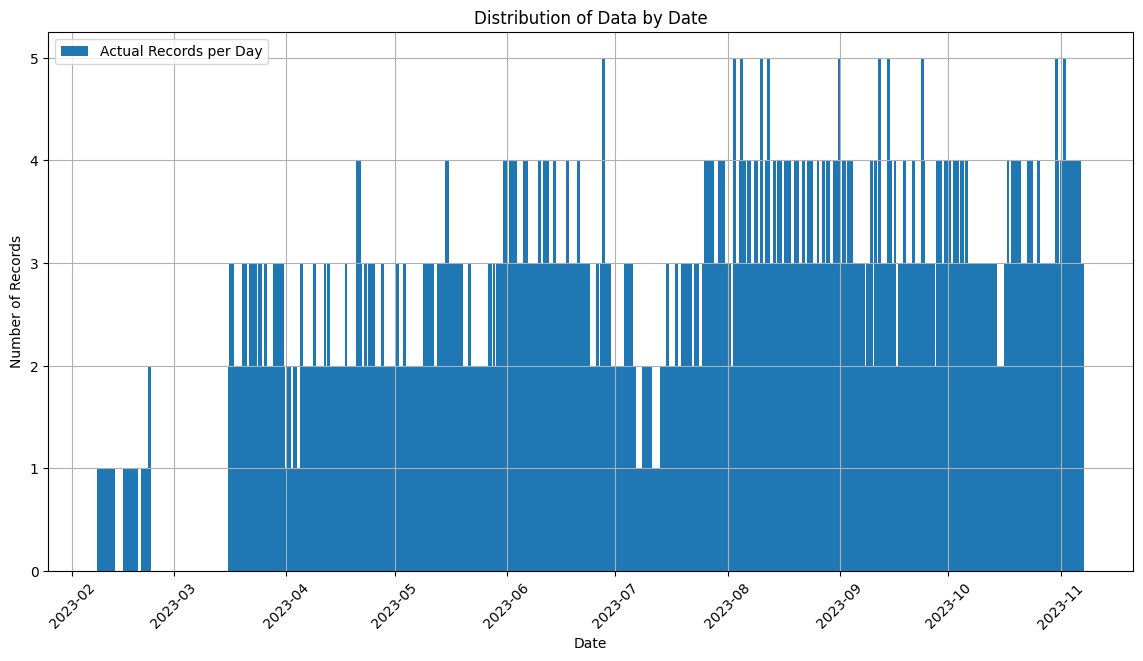

In [61]:
# Display the observations temporally

data['TmStamp'] = pd.to_datetime(data['TmStamp'], format='%d/%m/%Y %H:%M')

# Calculate the count of records per date
record_counts_per_date = data.groupby('TmStamp').size()

# Determine the date range in the dataset
date_range = pd.date_range(start=record_counts_per_date.index.min(), end=record_counts_per_date.index.max())

# Display the count of records per date and the missing dates
record_counts_per_date_df = record_counts_per_date.reset_index(name='Record Count')

# Plot the distribution of data by day and highlight days with missing data
plt.figure(figsize=(14, 7))
plt.bar(record_counts_per_date.index, record_counts_per_date, label='Actual Records per Day')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.title('Distribution of Data by Date')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Observations:** Since the dataset contains missing data between Feb to early March, we will remove those instances and focus only on the duration: 2023-03-16 to 2023-11-07.

In [62]:
# Filter the DataFrame based on the date range
start_date = '2023-03-16'
end_date = '2023-11-07'
data = data[(data['TmStamp'] >= start_date) & (data['TmStamp'] <= end_date)]

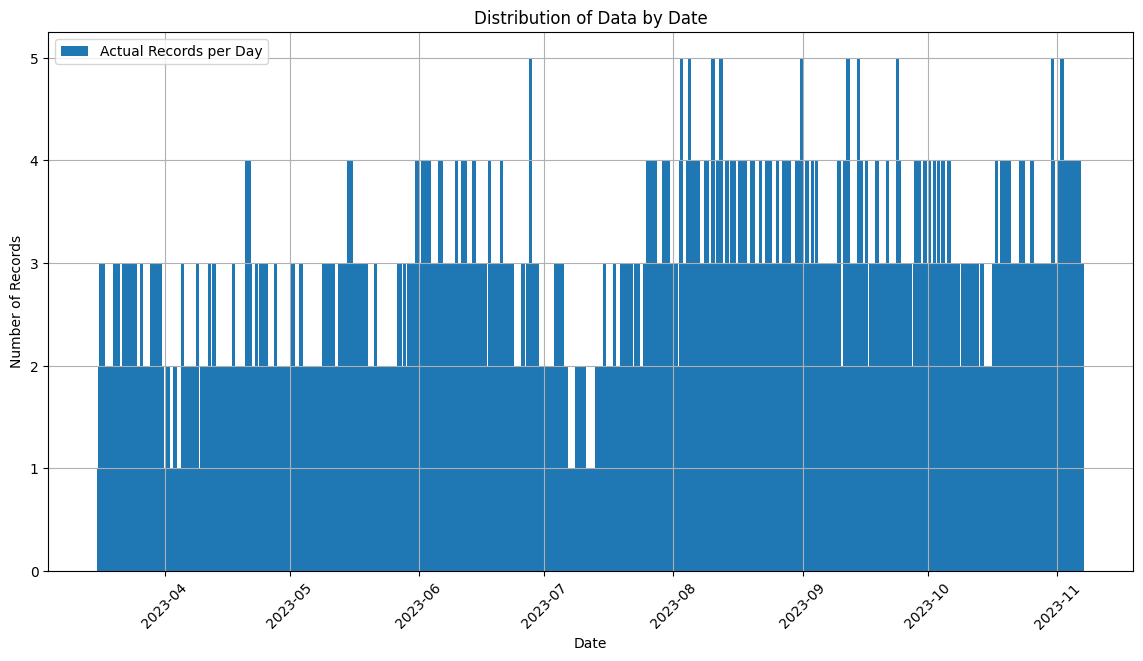

In [63]:
# Display the observations temporally - updated graph

data['TmStamp'] = pd.to_datetime(data['TmStamp'], format='%d/%m/%Y %H:%M')

# Calculate the count of records per date
record_counts_per_date = data.groupby('TmStamp').size()

# Determine the date range in the dataset
date_range = pd.date_range(start=record_counts_per_date.index.min(), end=record_counts_per_date.index.max())

# Display the count of records per date and the missing dates
record_counts_per_date_df = record_counts_per_date.reset_index(name='Record Count')

# Plot the distribution of data by day and highlight days with missing data
plt.figure(figsize=(14, 7))
plt.bar(record_counts_per_date.index, record_counts_per_date, label='Actual Records per Day')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.title('Distribution of Data by Date')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [64]:
#Check for missing data and impute
data.isnull().sum() 

Classroom Type            0
Measured T_mean           0
Measured T_min            0
Measured T_max            0
School Day                0
School Hours              0
Break Time                0
Power On                  0
TmStamp                   0
TrackerWM_Avg_mean       95
TrackerWM_Avg_min        95
TrackerWM_Avg_max        95
ShadowWM_Avg_mean        93
ShadowWM_Avg_min         93
ShadowWM_Avg_max         93
SunWM_Avg_mean           30
SunWM_Avg_min            30
SunWM_Avg_max            30
ShadowbandWM_Avg_mean     0
ShadowbandWM_Avg_min      0
ShadowbandWM_Avg_max      0
DNICalc_Avg_mean         27
DNICalc_Avg_min          27
DNICalc_Avg_max          27
AirTC_Avg_mean            1
AirTC_Avg_min             1
AirTC_Avg_max             1
RH_mean                   0
RH_min                    0
RH_max                    0
WS_ms_S_WVT_mean          0
WS_ms_S_WVT_min           0
WS_ms_S_WVT_max           0
WindDir_D1_WVT_mean       0
WindDir_D1_WVT_min        0
WindDir_D1_WVT_max  

**Impute Missing Values**

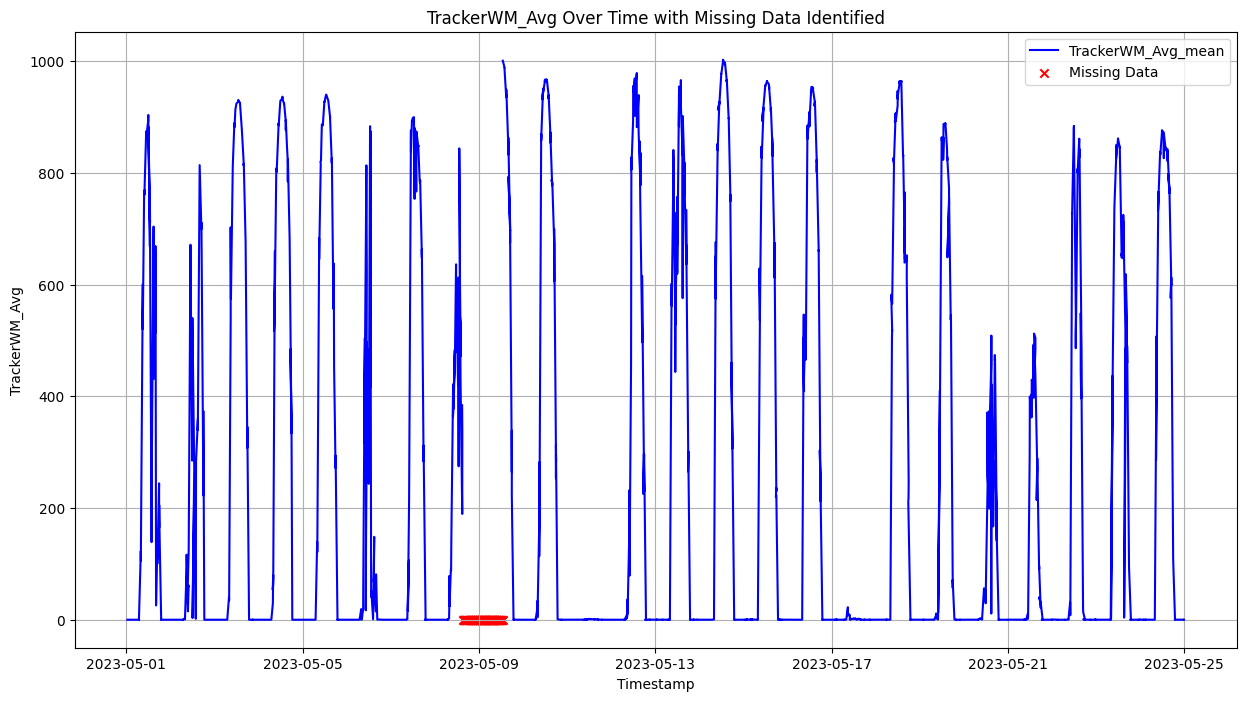

In [65]:
null_records = data[data['TrackerWM_Avg_mean'].isnull()]
# null_records
#Null records between the data range 8 May 2023 and 18 May 2023 

start_date = '2023-05-01'
end_date = '2023-05-25'
data = data[(data['TmStamp'] >= start_date) & (data['TmStamp'] <= end_date)]

# Plot the "TrackerWM_Avg" over time
plt.figure(figsize=(15, 8))
plt.plot(data['TmStamp'], data['TrackerWM_Avg_mean'], label='TrackerWM_Avg_mean', color='blue')

# Highlight missing data points
missing_data = data[data['TrackerWM_Avg_mean'].isnull()]
plt.scatter(missing_data['TmStamp'], [0] * len(missing_data), color='red', label='Missing Data', marker='x')

# Formatting the plot
plt.title('TrackerWM_Avg Over Time with Missing Data Identified')
plt.xlabel('Timestamp')
plt.ylabel('TrackerWM_Avg')
plt.legend()
plt.grid(True)
plt.show()

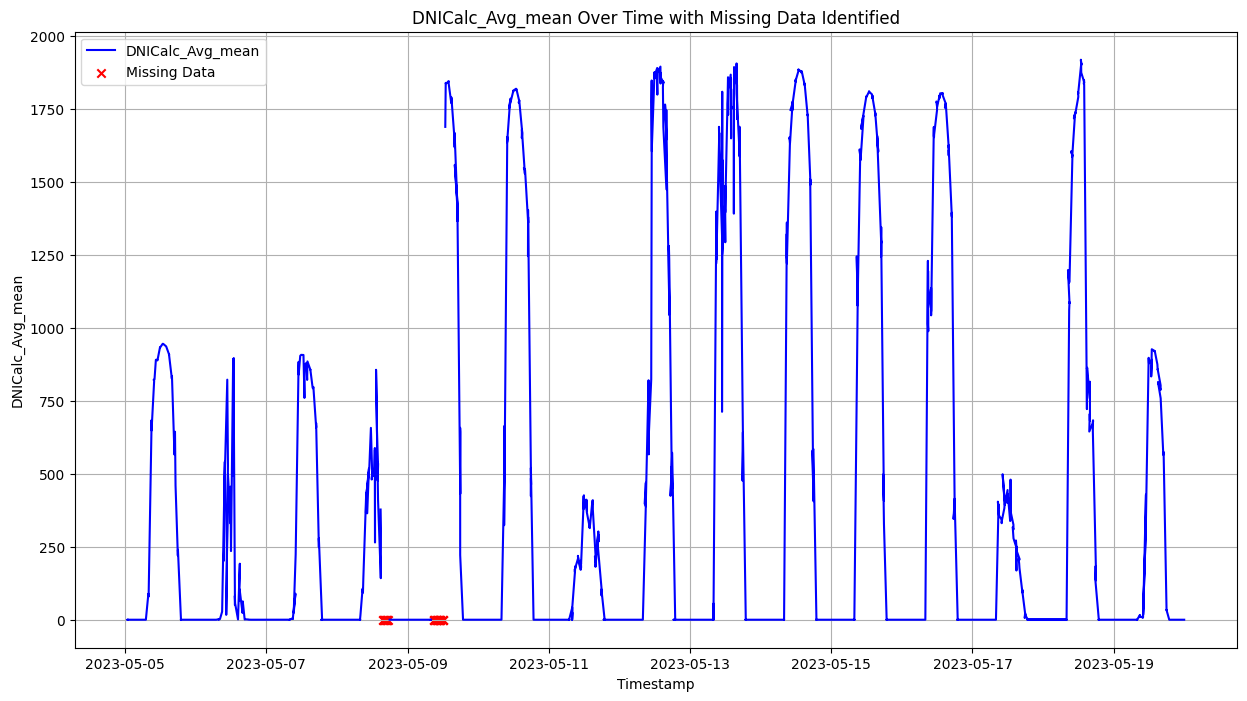

In [66]:
# null_records = data[data['DNICalc_Avg_mean'].isnull()]
# null_records

start_date = '2023-05-05'
end_date = '2023-05-20'
data = data[(data['TmStamp'] >= start_date) & (data['TmStamp'] <= end_date)]

# Plot the "TrackerWM_Avg" over time
plt.figure(figsize=(15, 8))
plt.plot(data['TmStamp'], data['DNICalc_Avg_mean'], label='DNICalc_Avg_mean', color='blue')

# Highlight missing data points
missing_data = data[data['DNICalc_Avg_mean'].isnull()]
plt.scatter(missing_data['TmStamp'], [0] * len(missing_data), color='red', label='Missing Data', marker='x')

# Formatting the plot
plt.title('DNICalc_Avg_mean Over Time with Missing Data Identified')
plt.xlabel('Timestamp')
plt.ylabel('DNICalc_Avg_mean')
plt.legend()
plt.grid(True)
plt.show()

By visualizing the missing data across the variables, forward fill/backward fill or linear interpolation

In [67]:
data['TrackerWM_Avg_min'].fillna( method ='ffill', inplace = True) 
data['TrackerWM_Avg_mean'].fillna( method ='ffill', inplace = True) 
data['TrackerWM_Avg_max'].fillna( method ='ffill', inplace = True) 

data['ShadowWM_Avg_min'].fillna( method ='ffill', inplace = True) 
data['ShadowWM_Avg_mean'].fillna( method ='ffill', inplace = True) 
data['ShadowWM_Avg_max'].fillna( method ='ffill', inplace = True) 

data['SunWM_Avg_min'].fillna( method ='ffill', inplace = True) 
data['SunWM_Avg_mean'].fillna( method ='ffill', inplace = True) 
data['SunWM_Avg_max'].fillna( method ='ffill', inplace = True) 

data['DNICalc_Avg_min'].fillna( method ='ffill', inplace = True) 
data['DNICalc_Avg_mean'].fillna( method ='ffill', inplace = True) 
data['DNICalc_Avg_max'].fillna( method ='ffill', inplace = True) 

data['AirTC_Avg_min'].fillna( method ='ffill', inplace = True) 
data['AirTC_Avg_mean'].fillna( method ='ffill', inplace = True)
data['AirTC_Avg_max'].fillna( method ='ffill', inplace = True) 

data.isnull().sum()    

/var/folders/sr/cf_jdmpx78952kg9qz2tkjqh0000gn/T/ipykernel_62654/915472694.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TrackerWM_Avg_min'].fillna( method ='ffill', inplace = True)
/var/folders/sr/cf_jdmpx78952kg9qz2tkjqh0000gn/T/ipykernel_62654/915472694.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['TrackerWM_Avg_min'].fillna( method ='ffill', inplace = True)
/var/folders/sr/cf_jdmpx78952kg9qz2tkjqh0000gn/T/ipyker

Classroom Type           0
Measured T_mean          0
Measured T_min           0
Measured T_max           0
School Day               0
School Hours             0
Break Time               0
Power On                 0
TmStamp                  0
TrackerWM_Avg_mean       0
TrackerWM_Avg_min        0
TrackerWM_Avg_max        0
ShadowWM_Avg_mean        0
ShadowWM_Avg_min         0
ShadowWM_Avg_max         0
SunWM_Avg_mean           0
SunWM_Avg_min            0
SunWM_Avg_max            0
ShadowbandWM_Avg_mean    0
ShadowbandWM_Avg_min     0
ShadowbandWM_Avg_max     0
DNICalc_Avg_mean         0
DNICalc_Avg_min          0
DNICalc_Avg_max          0
AirTC_Avg_mean           0
AirTC_Avg_min            0
AirTC_Avg_max            0
RH_mean                  0
RH_min                   0
RH_max                   0
WS_ms_S_WVT_mean         0
WS_ms_S_WVT_min          0
WS_ms_S_WVT_max          0
WindDir_D1_WVT_mean      0
WindDir_D1_WVT_min       0
WindDir_D1_WVT_max       0
WindDir_SD1_WVT_mean     0
W

**Predictor Variable Analysis**

/var/folders/sr/cf_jdmpx78952kg9qz2tkjqh0000gn/T/ipykernel_62654/2501777066.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hourly_mean, x='Hour', y='Measured T_mean', hue='Classroom Type', ci=None)


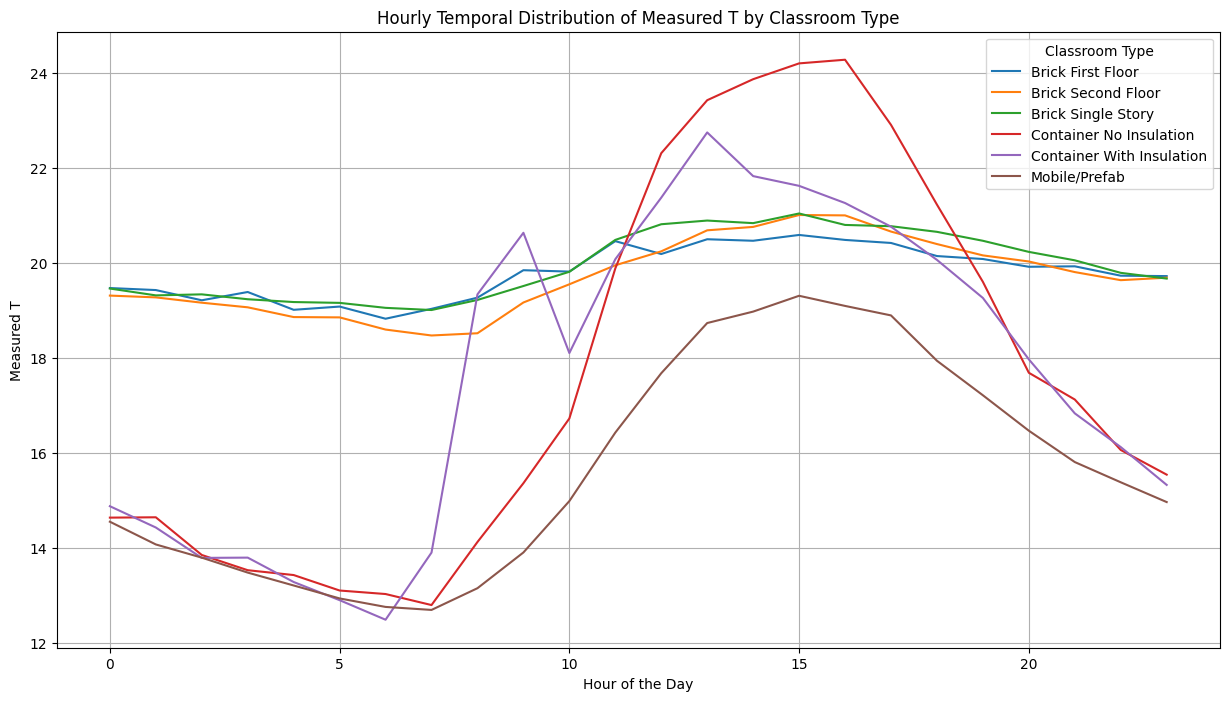

In [68]:
# Group by hour and classroom type, then calculate the mean
hourly_mean = data.groupby(['Hour', 'Classroom Type'])['Measured T_mean'].mean().reset_index()

# Plot the hourly temporal distribution of "Measured T" by different classroom types
plt.figure(figsize=(15, 8))
sns.lineplot(data=hourly_mean, x='Hour', y='Measured T_mean', hue='Classroom Type', ci=None)
plt.title('Hourly Temporal Distribution of Measured T by Classroom Type')
plt.xlabel('Hour of the Day')
plt.ylabel('Measured T')
plt.legend(title='Classroom Type')
plt.grid(True)
plt.show()

/var/folders/sr/cf_jdmpx78952kg9qz2tkjqh0000gn/T/ipykernel_57784/154830441.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hourly_mean_school_day, x='Hour', y='Measured T_mean', hue='Classroom Type', style='School Day', ci=None)


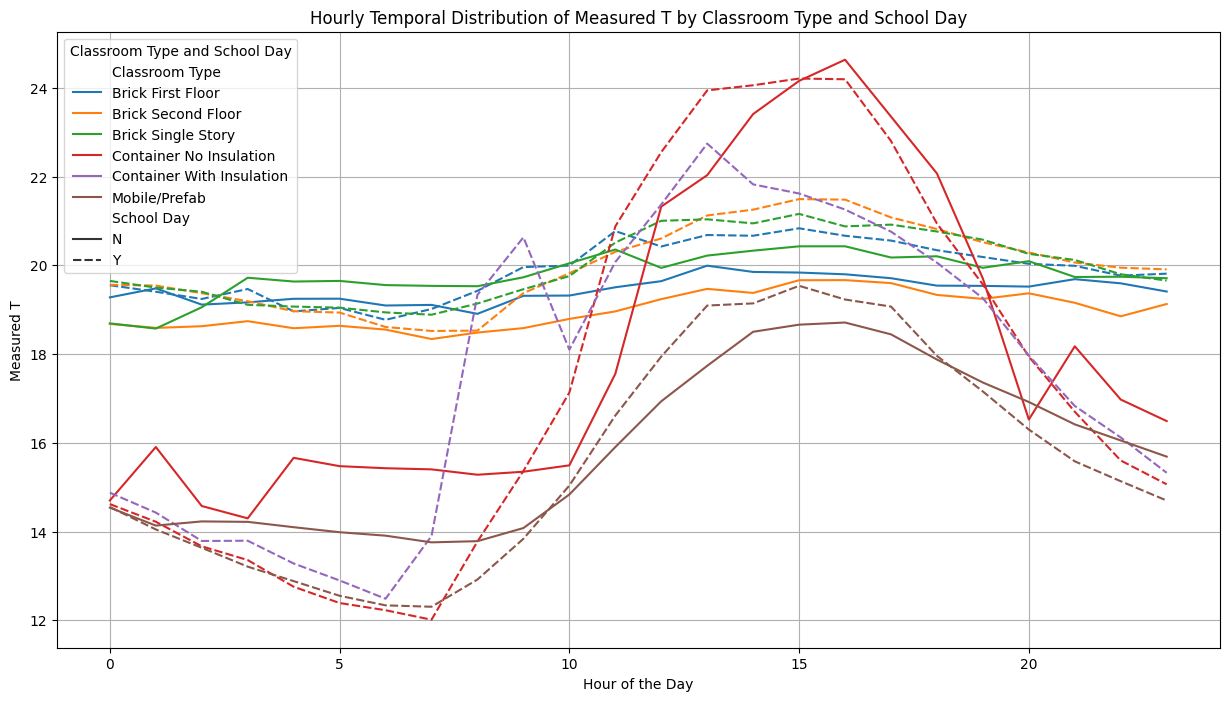

In [29]:
# Group by hour, classroom type, and school day, then calculate the mean
hourly_mean_school_day = data.groupby(['Hour', 'Classroom Type', 'School Day'])['Measured T_mean'].mean().reset_index()

# Plot the hourly temporal distribution of "Measured T" by classroom type and school day
plt.figure(figsize=(15, 8))
sns.lineplot(data=hourly_mean_school_day, x='Hour', y='Measured T_mean', hue='Classroom Type', style='School Day', ci=None)
plt.title('Hourly Temporal Distribution of Measured T by Classroom Type and School Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Measured T')
plt.legend(title='Classroom Type and School Day')
plt.grid(True)
plt.show()

In [30]:
# Inspect the First 5 rows of the Data Frame.
data.head()

,Classroom Type,Measured T_mean,Measured T_min,Measured T_max,School Day,School Hours,Break Time,Power On,TmStamp,TrackerWM_Avg_mean,...,BP_mB_Avg_max,UVA_Avg_mean,UVA_Avg_min,UVA_Avg_max,UVB_Avg_mean,UVB_Avg_min,UVB_Avg_max,Month,Day,Hour
5583,Brick Second Floor,18.520000,18.5,18.6,Y,N,N,Off,2023-05-05 00:50:00,0.000000,...,1003.87750,0.061912,0.061912,0.061912,0.009001,0.008006,0.009367,5,5,0
5584,Mobile/Prefab,13.822222,13.2,14.6,Y,N,N,Off,2023-05-05 00:46:00,0.000000,...,1003.92035,0.061912,0.061912,0.061912,0.008924,0.007513,0.009367,5,5,0
5585,Brick Second Floor,18.350000,18.3,18.4,Y,N,N,Off,2023-05-05 01:56:00,0.000000,...,1003.36190,0.061969,0.061912,0.062256,0.008550,0.006645,0.009367,5,5,1
5586,Mobile/Prefab,12.890000,12.3,13.5,Y,N,N,Off,2023-05-05 01:59:00,0.000000,...,1003.38275,0.061946,0.061912,0.062256,0.008569,0.006739,0.009367,5,5,1
5587,Brick Second Floor,18.220000,18.2,18.3,Y,N,N,Off,2023-05-05 02:57:00,0.083804,...,1002.61035,0.061912,0.061912,0.061912,0.008513,0.006552,0.009367,5,5,2


In [31]:
# Inspect the Last 5 rows of the Data Frame.
data.tail()

,Classroom Type,Measured T_mean,Measured T_min,Measured T_max,School Day,School Hours,Break Time,Power On,TmStamp,TrackerWM_Avg_mean,...,BP_mB_Avg_max,UVA_Avg_mean,UVA_Avg_min,UVA_Avg_max,UVB_Avg_mean,UVB_Avg_min,UVB_Avg_max,Month,Day,Hour
7160,Brick Second Floor,21.235714,19.6,22.0,Y,N,N,On,2023-05-19 22:56:00,0.000000,...,1006.23770,0.013955,0.012726,0.015822,0.009402,0.009367,0.009461,5,19,22
7161,Mobile/Prefab,13.742857,13.5,14.0,Y,N,N,On,2023-05-19 22:59:00,0.000000,...,1006.24310,0.014249,0.013414,0.014790,0.009400,0.009367,0.009437,5,19,22
7162,Brick First Floor,19.966667,19.5,20.3,Y,N,N,On,2023-05-19 23:53:00,0.014176,...,1005.90704,0.013414,0.011006,0.015478,0.009398,0.009367,0.009437,5,19,23
7163,Brick Second Floor,20.805882,19.4,21.9,Y,N,N,On,2023-05-19 23:56:00,0.000758,...,1005.86820,0.012180,0.010662,0.013758,0.009392,0.009367,0.009414,5,19,23
7164,Mobile/Prefab,13.755556,13.5,14.1,Y,N,N,On,2023-05-19 23:58:00,0.000000,...,1005.90704,0.012459,0.010662,0.015478,0.009390,0.009367,0.009437,5,19,23


# DESCRIPTIVE STATISTICS

In [32]:
data.describe()

,Measured T_mean,Measured T_min,Measured T_max,TmStamp,TrackerWM_Avg_mean,TrackerWM_Avg_min,TrackerWM_Avg_max,ShadowWM_Avg_mean,ShadowWM_Avg_min,ShadowWM_Avg_max,...,BP_mB_Avg_max,UVA_Avg_mean,UVA_Avg_min,UVA_Avg_max,UVB_Avg_mean,UVB_Avg_min,UVB_Avg_max,Month,Day,Hour
count,1582.000000,1582.000000,1582.000000,1582,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,...,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.0,1582.000000,1582.000000
mean,18.384520,17.555689,19.154614,2023-05-13 07:49:06.713021696,245.128456,174.149361,305.944747,50.272059,40.030977,61.836574,...,1005.508783,0.038342,0.034536,0.042053,0.009123,0.008979,0.009269,5.0,12.807206,11.561315
min,9.475000,8.700000,10.400000,2023-05-05 00:46:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,995.108400,0.000000,0.000000,0.000000,0.005355,0.003736,0.005355,5.0,5.000000,0.000000
25%,16.609375,15.800000,17.300000,2023-05-10 04:55:15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1002.706475,0.010761,0.007652,0.013410,0.009367,0.009367,0.009367,5.0,10.000000,6.000000
50%,19.147727,18.300000,19.900000,2023-05-13 12:58:00,0.162211,0.000000,0.719085,0.093108,0.000000,0.765907,...,1005.493330,0.016403,0.014446,0.018574,0.009367,0.009367,0.009367,5.0,13.000000,12.000000
75%,20.348611,19.500000,21.100000,2023-05-16 20:53:45,482.876297,22.368842,816.243100,69.316162,60.724937,78.497512,...,1008.553925,0.061912,0.061905,0.061912,0.009368,0.009367,0.009368,5.0,16.000000,18.000000
max,28.700000,28.200000,30.400000,2023-05-19 23:58:00,1002.501784,1000.792900,1008.339600,416.106570,416.106570,459.540220,...,1012.799700,0.184912,0.177750,0.185639,0.012178,0.012158,0.012182,5.0,19.000000,23.000000
std,3.064014,3.005854,3.191701,NaN,356.743701,329.363952,406.822189,75.165458,61.923330,92.008509,...,4.210418,0.039518,0.037972,0.041839,0.000818,0.000983,0.000757,0.0,4.067753,6.906695


**Observations:** Descriptive statistics indicate that all features have different means and standard deviations. This may necessitate data standardization later.

# STATISTICAL ANALYSIS OF VARIABLES

This section covers three main aspects of statistical analysis: univariate analysis, outlier detection, and correlation analysis.

Firstly, univariate analysis helps us understand how individual variables are distributed and whether they follow a normal pattern. We use histograms to create visual representations of these distributions, which show us how data points are spread out and whether there are any noticeable patterns like skewness.

Next, we conduct outlier detection by generating boxplots for each feature. Boxplots allow us to identify any data points that fall significantly outside the typical range, giving us insights into potential anomalies or extremes in the data.

Lastly, correlation analysis explores the relationships between variables. We calculate a correlation matrix using Pearson correlation coefficients, focusing particularly on how each variable relates to 'indoor_temperature'. This matrix is visualized using a heatmap, where different colors indicate the strength of correlations. These insights help us understand potential connections and interdependencies among variables, which are crucial for guiding further analysis and modeling efforts.

**Univariate Analysis**

In [36]:
cols_for_st_analysis = ['Measured T_mean','TrackerWM_Avg_mean', 'ShadowWM_Avg_mean', 'SunWM_Avg_mean', 'ShadowbandWM_Avg_mean', 'DNICalc_Avg_mean', 'AirTC_Avg_mean', 'WS_ms_S_WVT_mean', 'WindDir_SD1_WVT_mean', 'UVA_Avg_mean', 'UVB_Avg_mean']

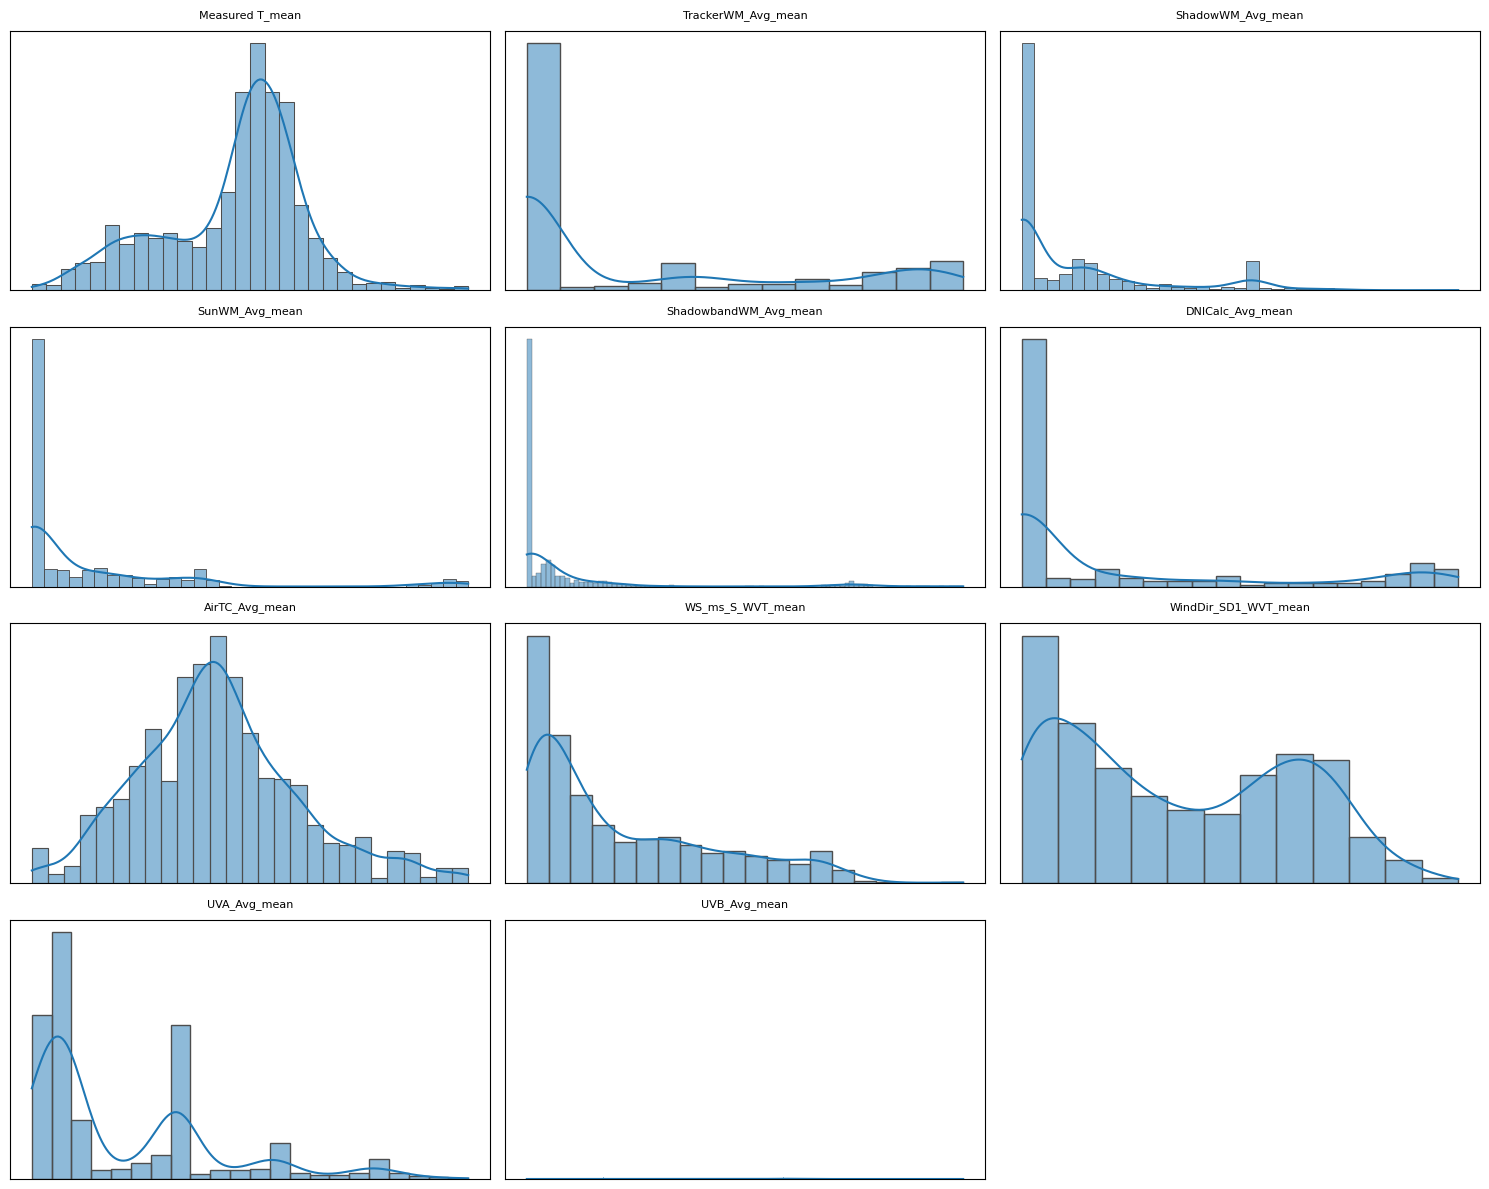

In [38]:
# Generate Histograms to observe data distribution.

# # Create subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

# Loop through each axis and plot the histogram
for i, ax in enumerate(axes.flat):
    if i < len(cols_for_st_analysis):
        sns.histplot(data=data, x=cols_for_st_analysis[i], kde=True, ax=ax, edgecolor=".3")
        ax.set_title(f'{cols_for_st_analysis[i]}', pad=10, fontsize=8)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(axis='both', which='both', bottom=False, left=False)
    else:
        ax.set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

**Observations:** It seems that the data in most of the features deviate from a normal distribution.

**Outlier Detection**

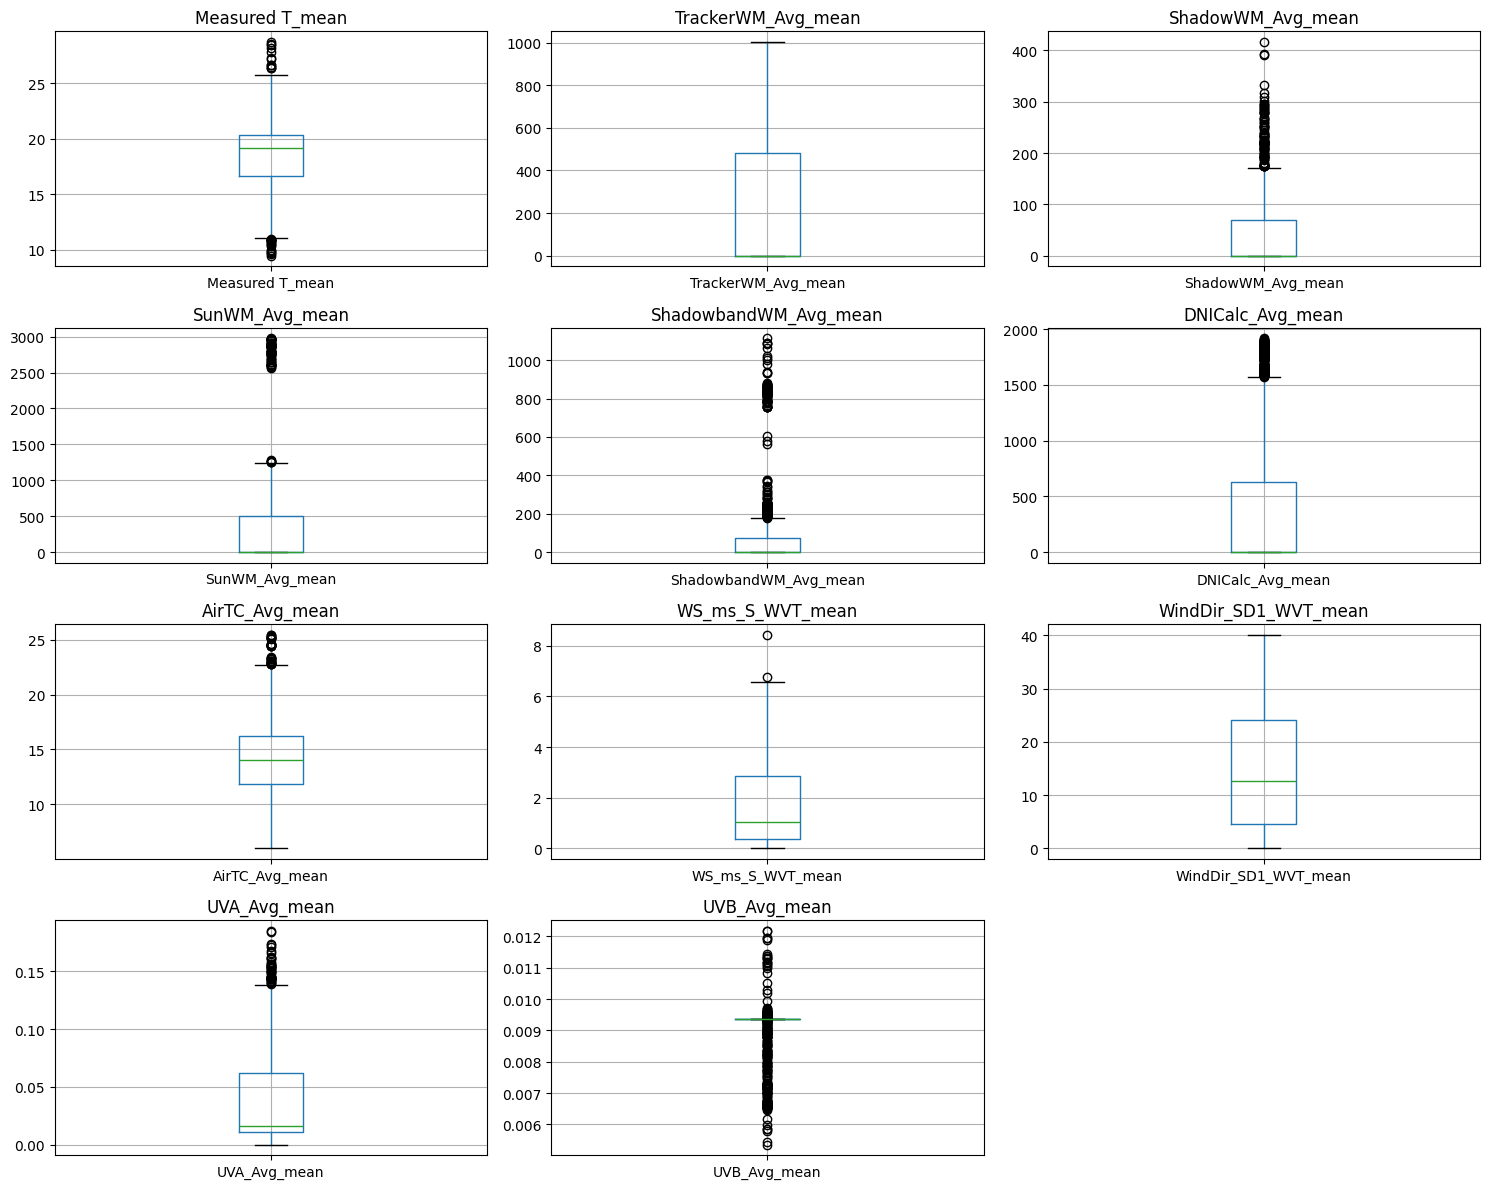

In [39]:
# Generate Boxplots to for outlier detection.

# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

# Loop through each axis and plot the boxplot
for i, ax in enumerate(axes.flat):
    if i < len(cols_for_st_analysis):
        data.boxplot(column=cols_for_st_analysis[i], ax=ax)
        ax.set_title(cols_for_st_analysis[i])
    else:
        ax.set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

**Observations:** It appears that all features, except for UVB_Avg, exhibit outliers.

**Correlation Analysis**

In [40]:
corr_matrix_p = round(data[cols_for_st_analysis].corr(), 2)
corr_matrix_p['Measured T_mean'].sort_values(ascending=False)

Measured T_mean          1.00
AirTC_Avg_mean           0.52
DNICalc_Avg_mean         0.31
TrackerWM_Avg_mean       0.29
UVA_Avg_mean             0.18
ShadowWM_Avg_mean        0.16
WindDir_SD1_WVT_mean     0.14
WS_ms_S_WVT_mean         0.13
SunWM_Avg_mean           0.12
ShadowbandWM_Avg_mean    0.07
UVB_Avg_mean             0.01
Name: Measured T_mean, dtype: float64

<Axes: >

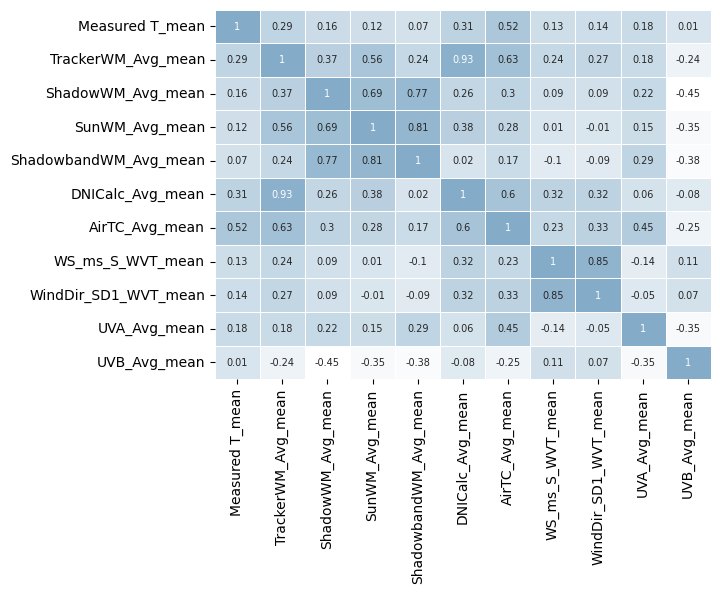

In [44]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom_blue', ['#FFFFFF', '#84ACC8'])
sns.heatmap(corr_matrix_p, annot = True, cmap = cmap, linewidths = 0.5, annot_kws={"size": 7}, cbar=False)

**Observations:** External factor that significantly affect indoor temperature include outdoor temperature (0.73) has a positive influence. Average UV B (0.50) and Average UV A (0.39), also moderately affect indoor temperature.

Factors such as Diffuse Horizontal Irradiance (DHI) (0.23) and wind speed (0.22) have weaker correlations with indoor temperature. These findings highlight the environmental variables that significantly impact indoor temperature dynamics.

In [46]:
# Calculate the correlation matrix using Spearman's rank correlation which is better suited for non-normally distributed data
corr_matrix_s = round(data[cols_for_st_analysis].corr(method='spearman'), 2)
corr_matrix_s['Measured T_mean'].sort_values(ascending=False)

Measured T_mean          1.00
AirTC_Avg_mean           0.51
DNICalc_Avg_mean         0.37
TrackerWM_Avg_mean       0.31
SunWM_Avg_mean           0.27
ShadowWM_Avg_mean        0.25
ShadowbandWM_Avg_mean    0.24
WS_ms_S_WVT_mean         0.15
UVB_Avg_mean             0.15
WindDir_SD1_WVT_mean     0.14
UVA_Avg_mean             0.10
Name: Measured T_mean, dtype: float64